In [1]:
%matplotlib inline

In [2]:
import linearRunner
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.rcParams["figure.figsize"] = (16, 7)

In [4]:
# Constants
OFFSETS = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
SLOPES = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
OFFSETS_AND_SLOPES = [(a, b) for a in OFFSETS for b in SLOPES]
ALPHA = 1.5
N = 100
T_FACTOR = 1000
MEASURE_STEP = 10
RUN_COUNT = 64
THREAD_COUNT = 4
MUTATION_SCALE = range(0, T_FACTOR * N + 1, MEASURE_STEP)

In [5]:
measures = [linearRunner.linearRunner(offset, slope, ALPHA, N, T_FACTOR, MEASURE_STEP, RUN_COUNT, THREAD_COUNT) for offset, slope in OFFSETS_AND_SLOPES]

# FIXED BETAS

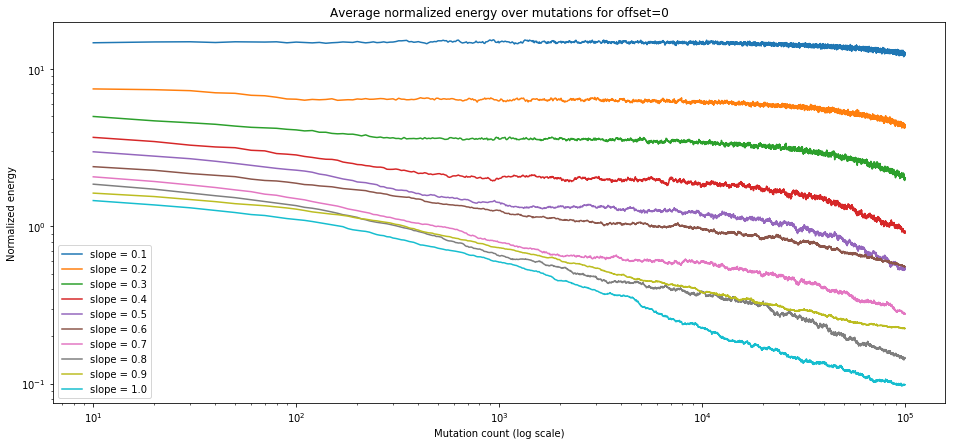

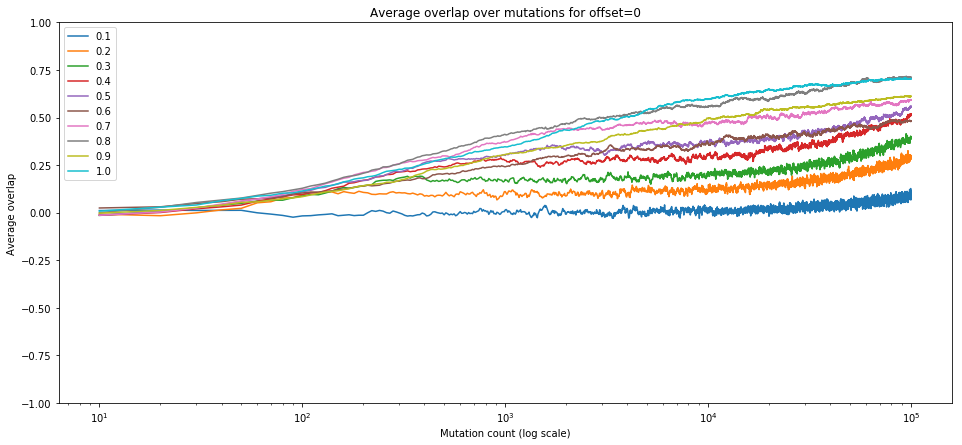

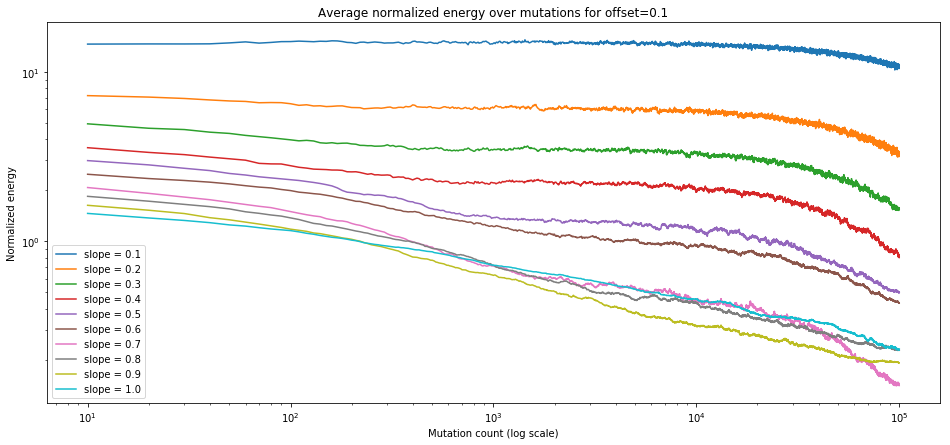

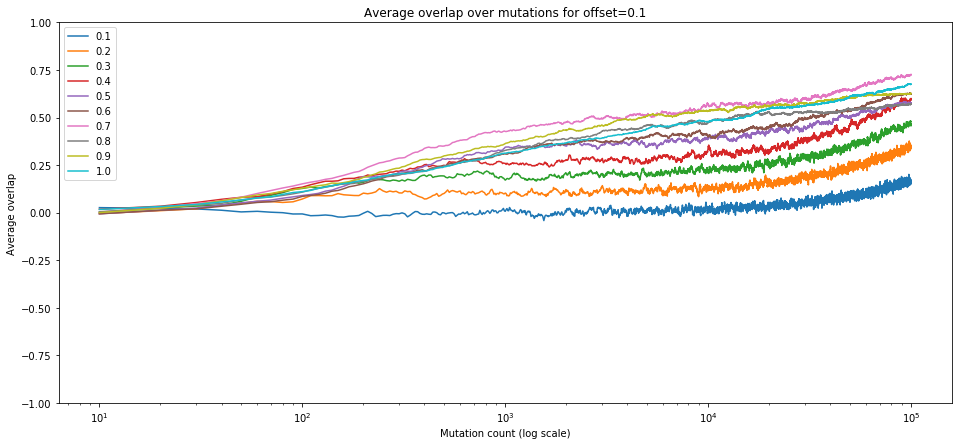

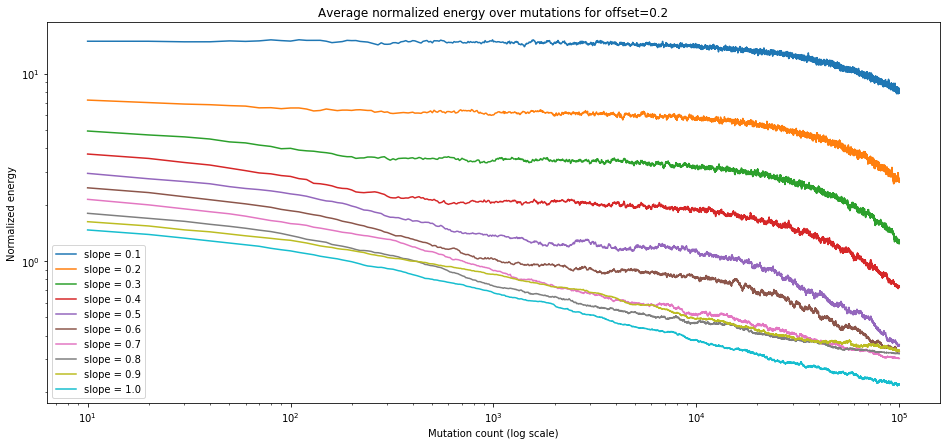

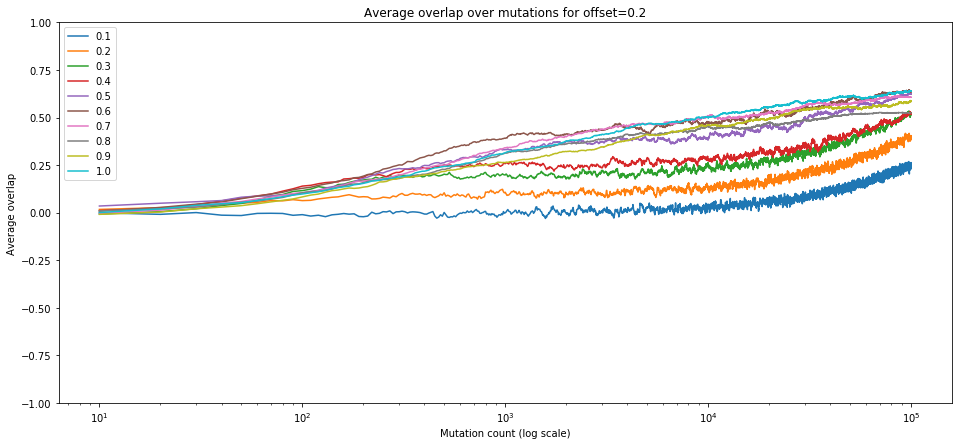

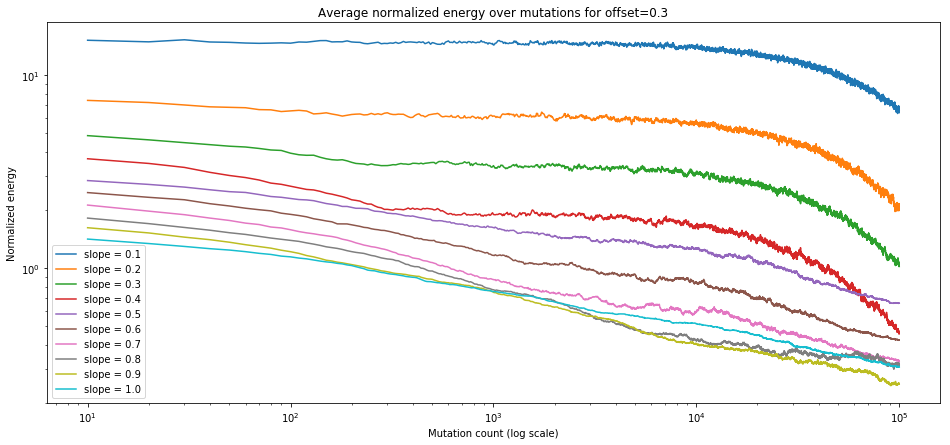

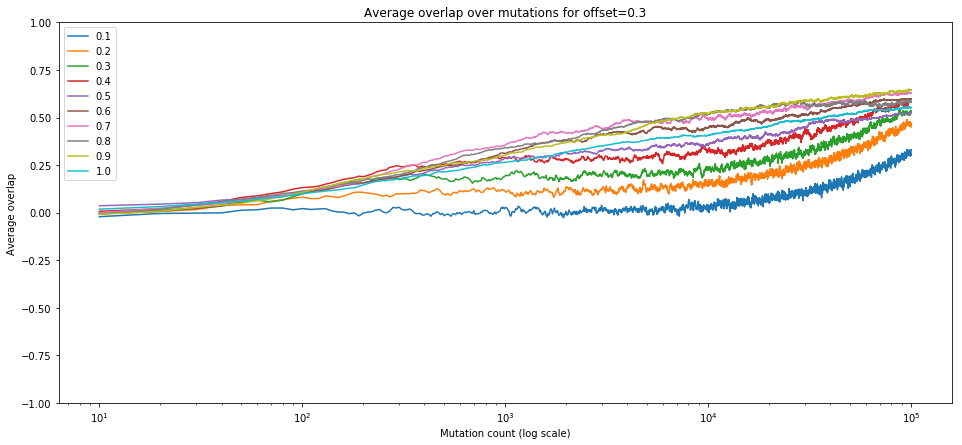

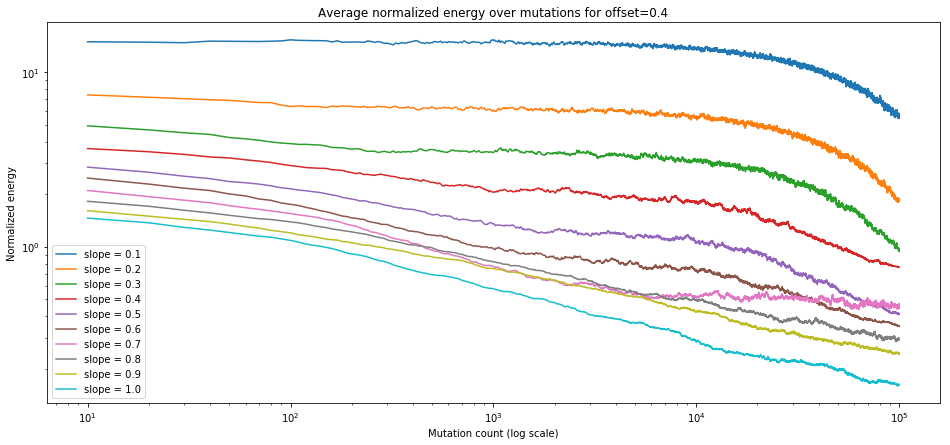

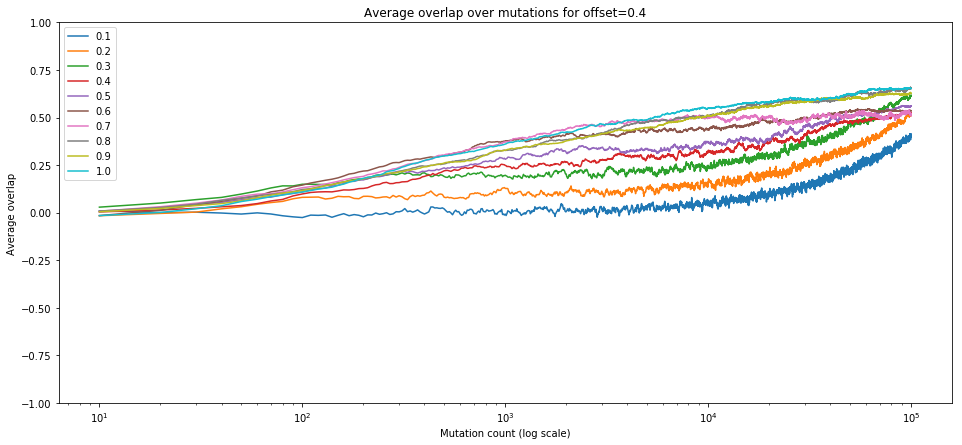

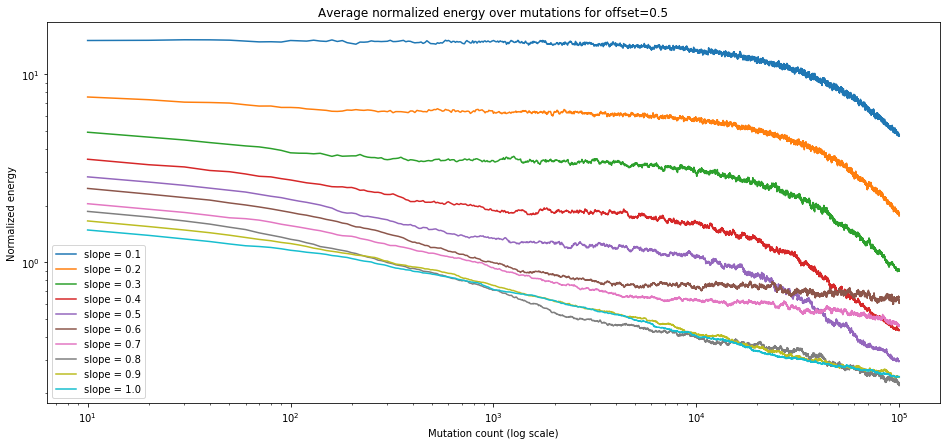

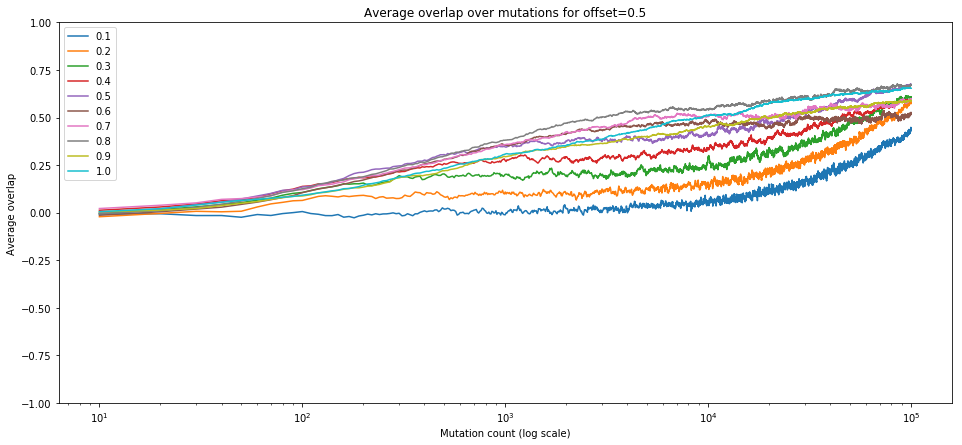

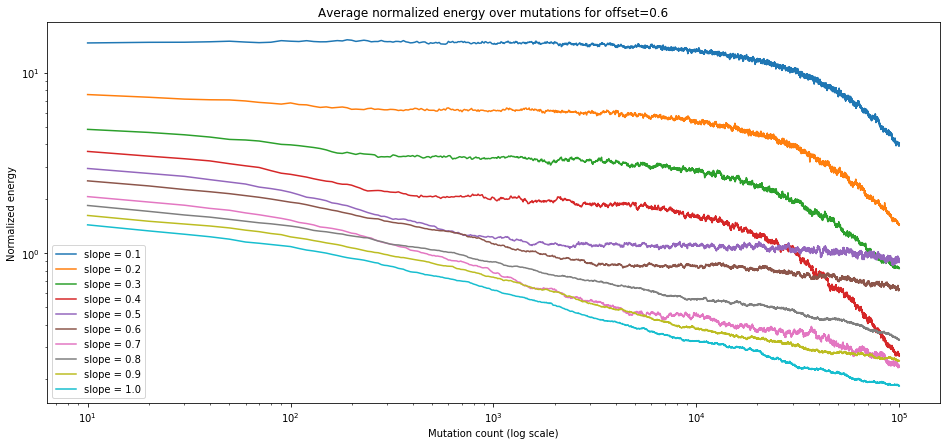

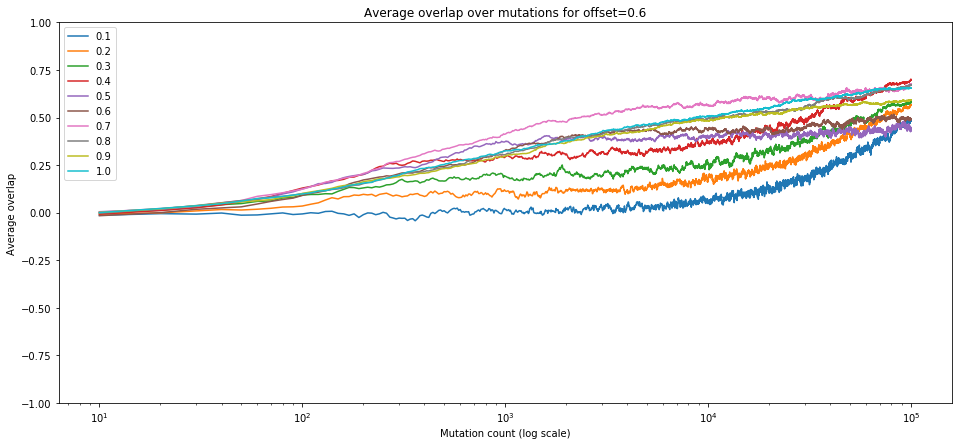

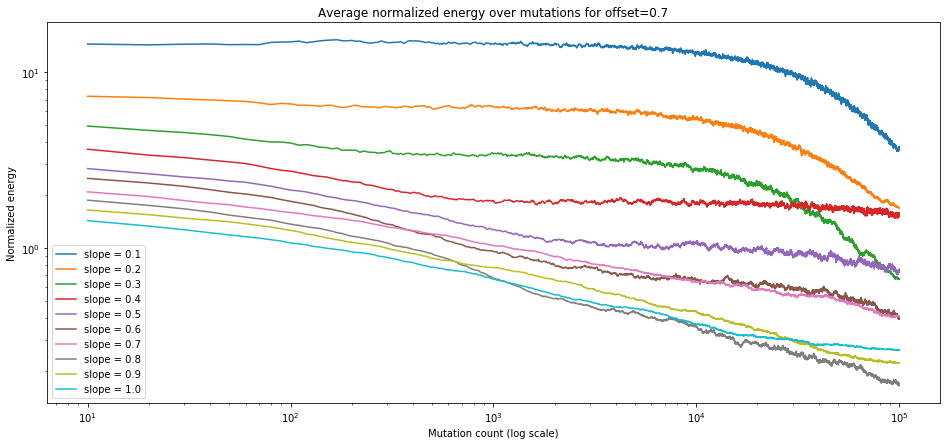

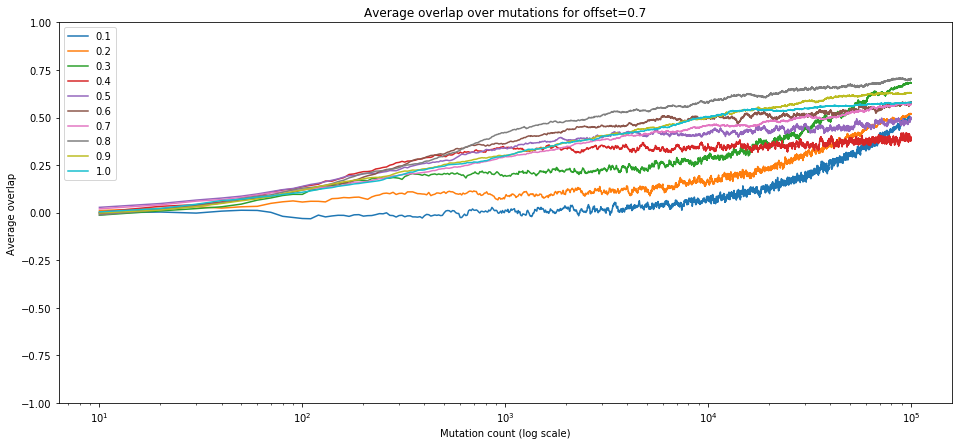

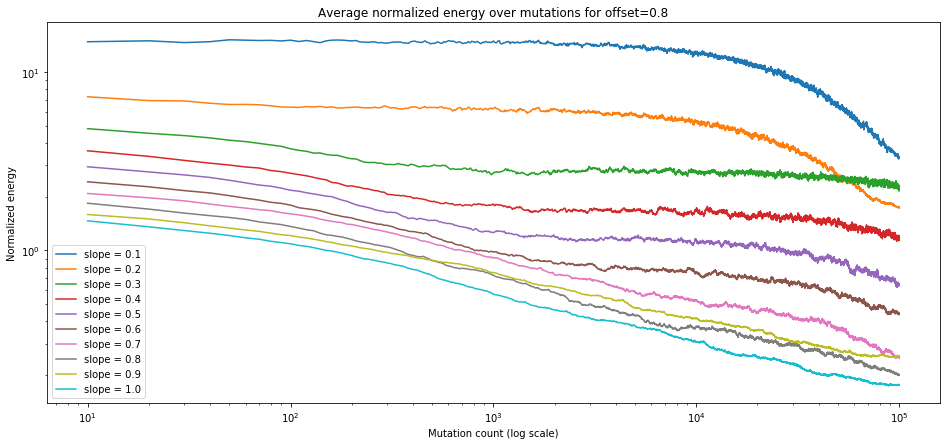

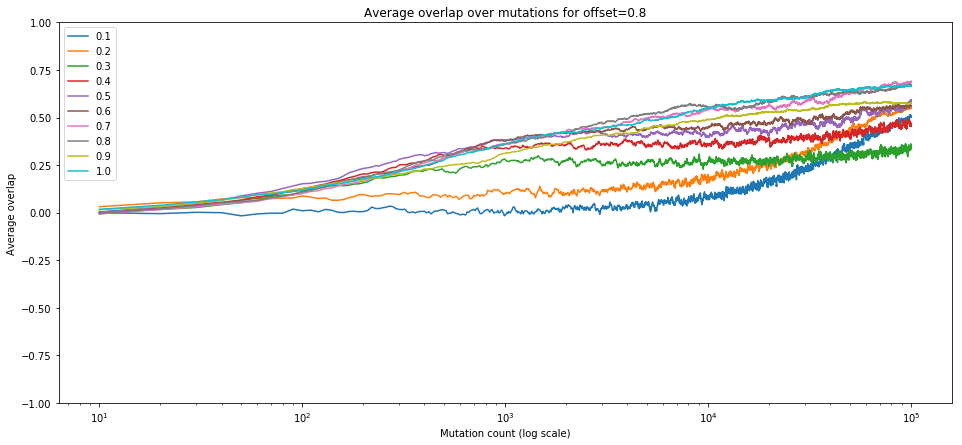

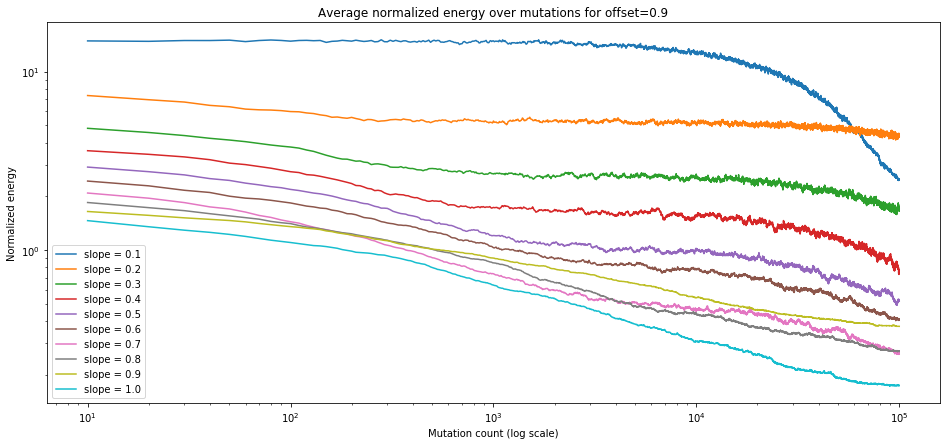

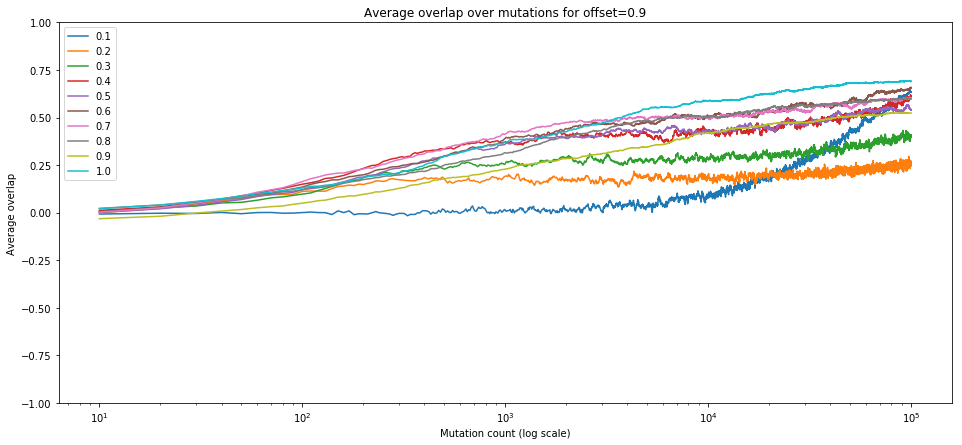

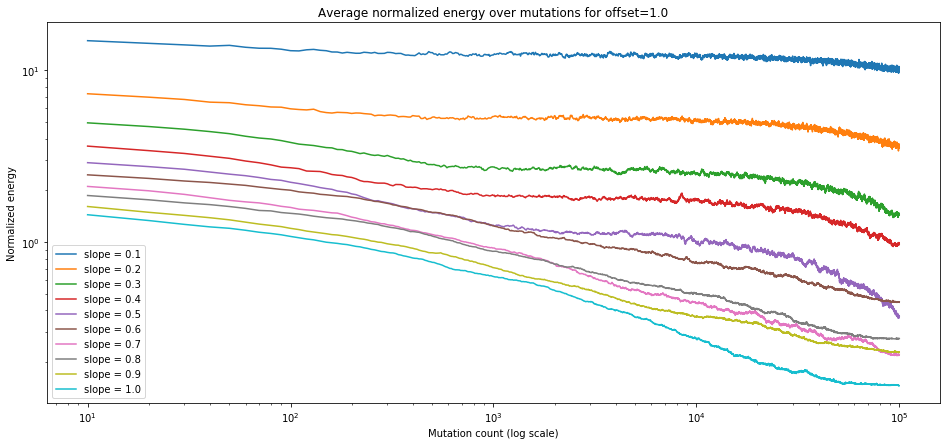

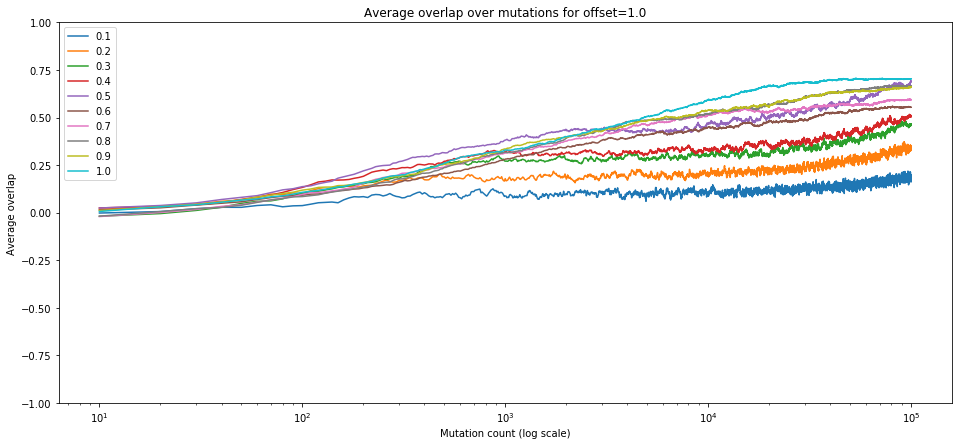

In [6]:
# Plot
for betaOffset in range(len(OFFSETS)):
    for i in range(len(SLOPES)):
        index = i * len(OFFSETS) + betaOffset
        eMeasuresForAlpha, tmp = measures[index]
        averageEMeasuresForAlpha = np.mean(eMeasuresForAlpha, axis=1)
        plt.plot(MUTATION_SCALE, averageEMeasuresForAlpha / int(SLOPES[i] * N), label='slope = ' + str(SLOPES[i]))
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(loc='best')
    plt.title('Average normalized energy over mutations for offset=' + str(OFFSETS[betaOffset]))
    plt.xlabel('Mutation count (log scale)')
    plt.ylabel('Normalized energy')
    plt.show()
    
    
    for i in range(len(SLOPES)):
        index = i * len(OFFSETS) + betaOffset
        tmp, overlapMeasuresForAlpha = measures[index]
        overlapMeasuresForAlpha = np.mean(overlapMeasuresForAlpha, axis=1)
        plt.plot(MUTATION_SCALE, overlapMeasuresForAlpha, label=str(SLOPES[i]))
    plt.xscale('log')
    plt.ylim(ymin=-1, ymax=1)
    plt.legend(loc='best')
    plt.title('Average overlap over mutations for offset=' + str(OFFSETS[betaOffset]))
    plt.xlabel('Mutation count (log scale)')
    plt.ylabel('Average overlap')
    plt.show()

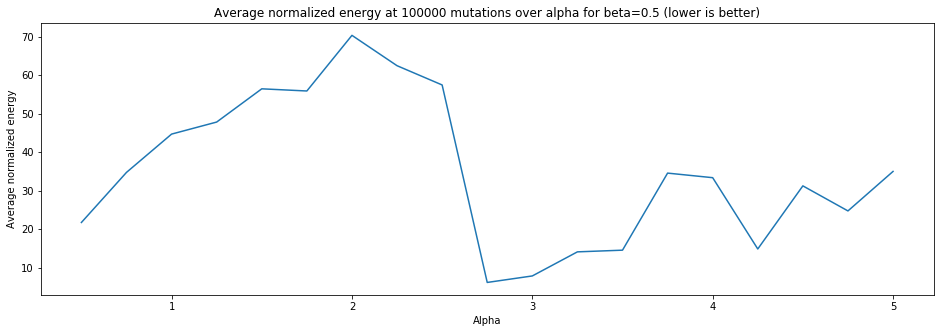

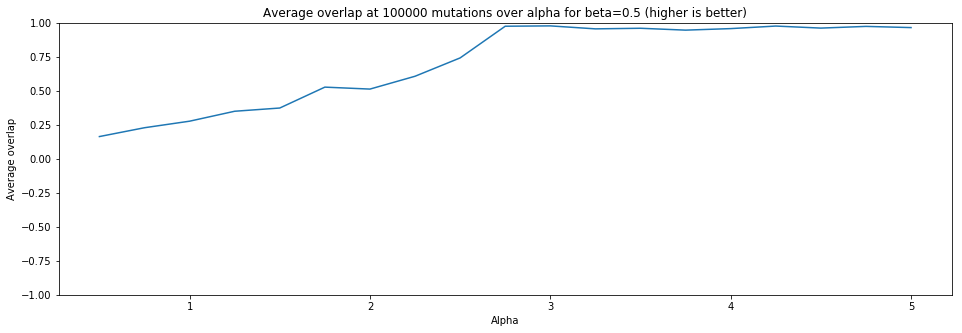

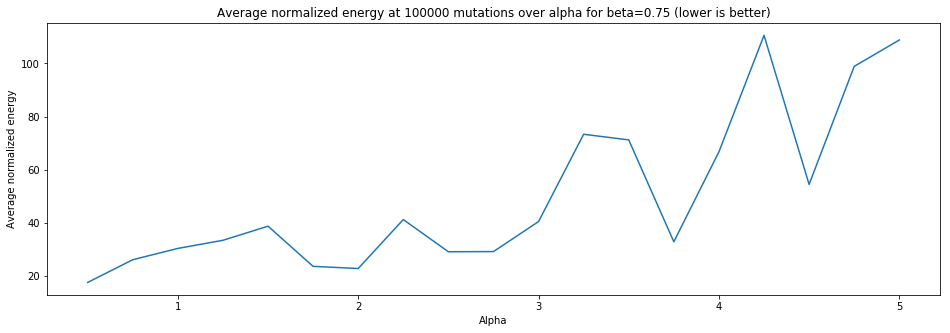

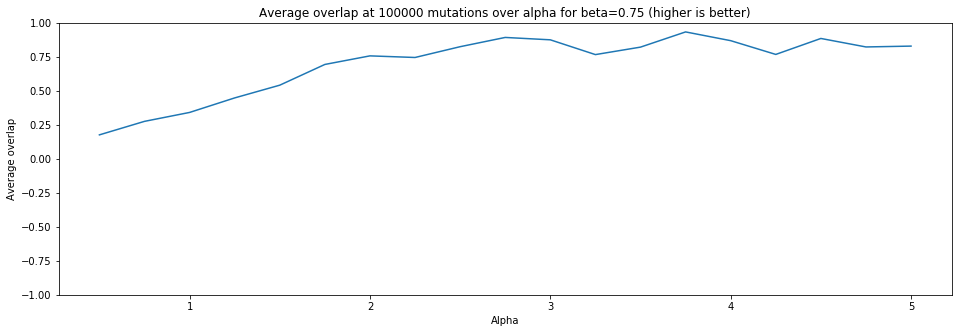

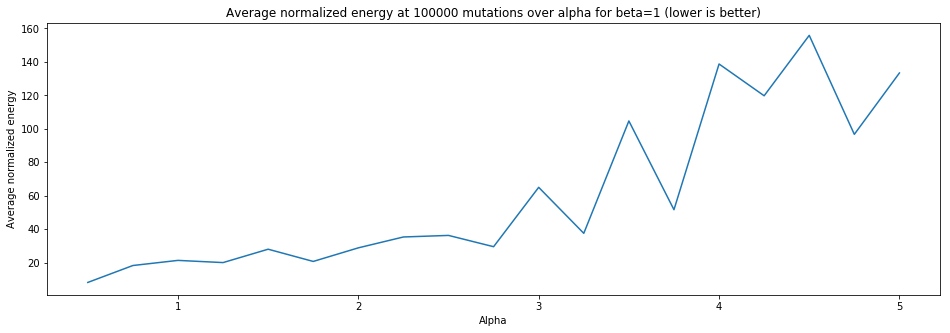

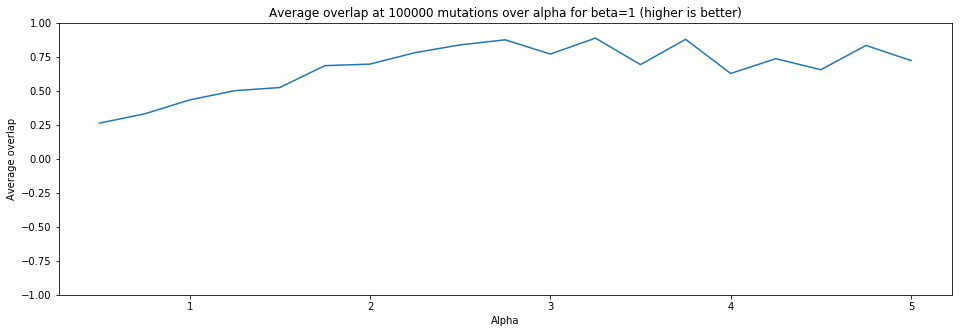

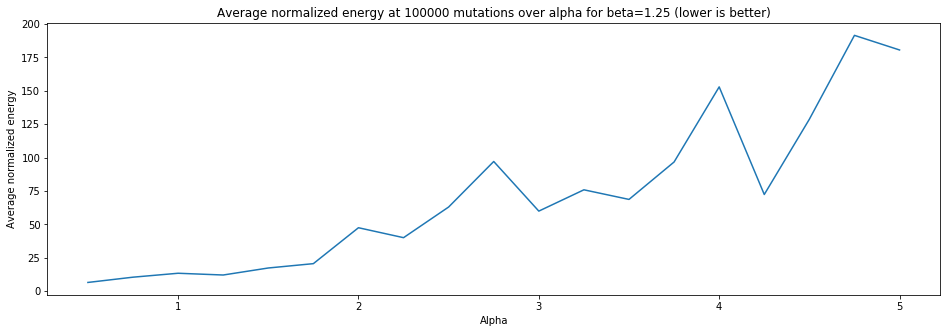

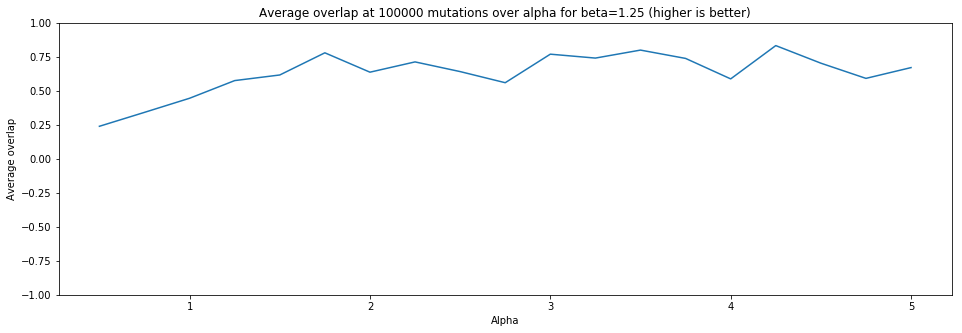

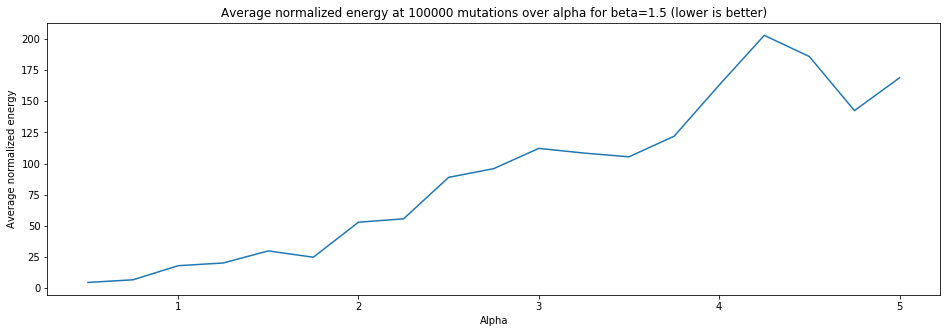

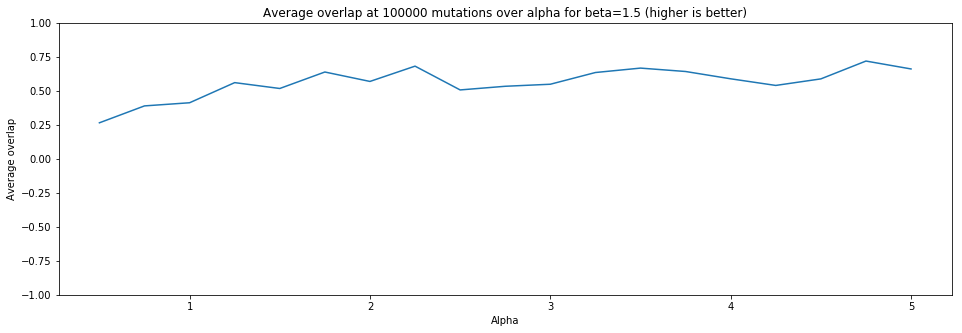

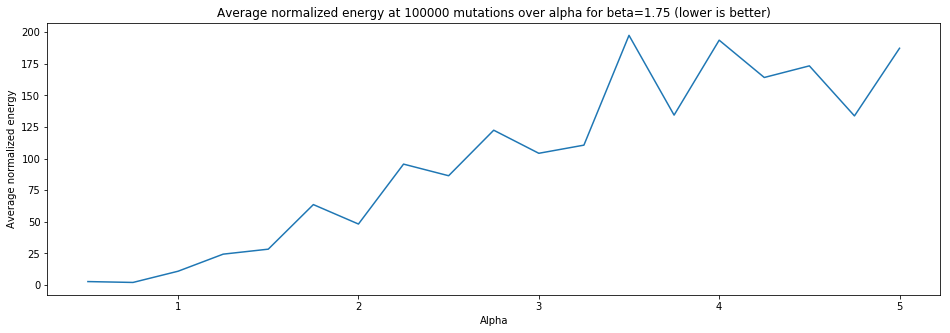

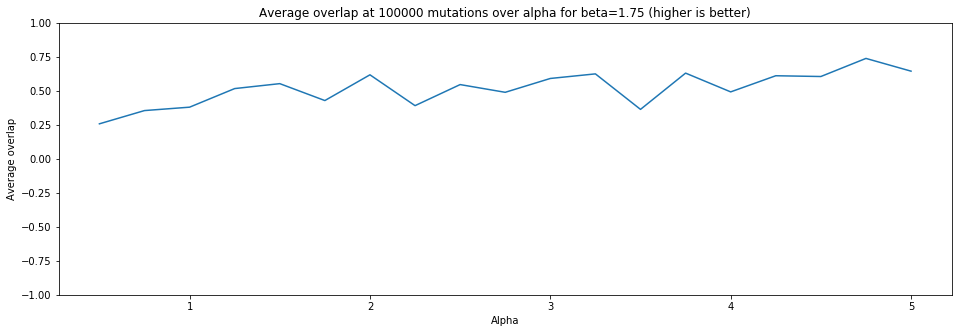

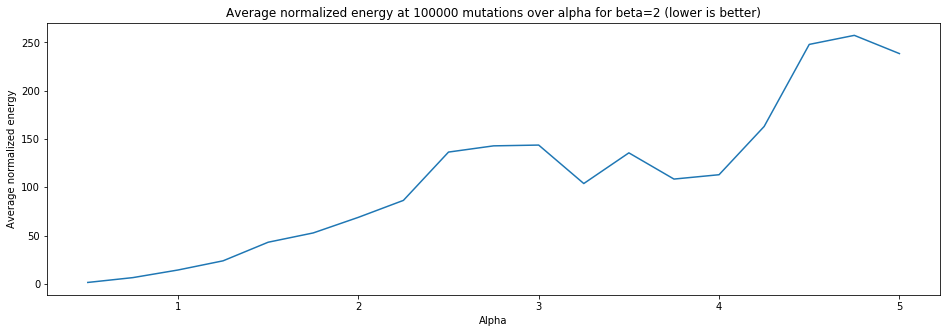

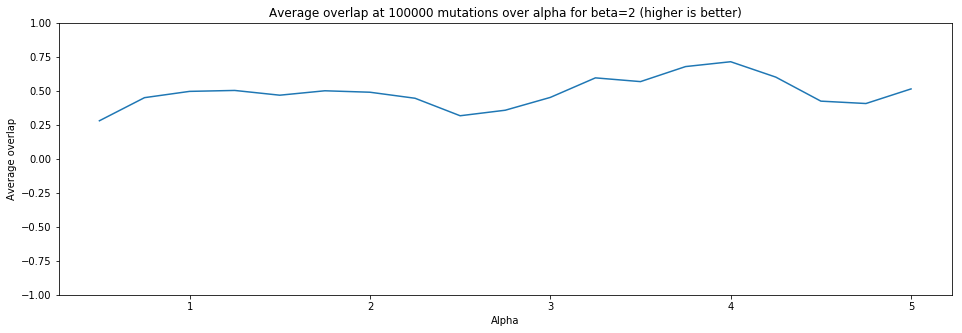

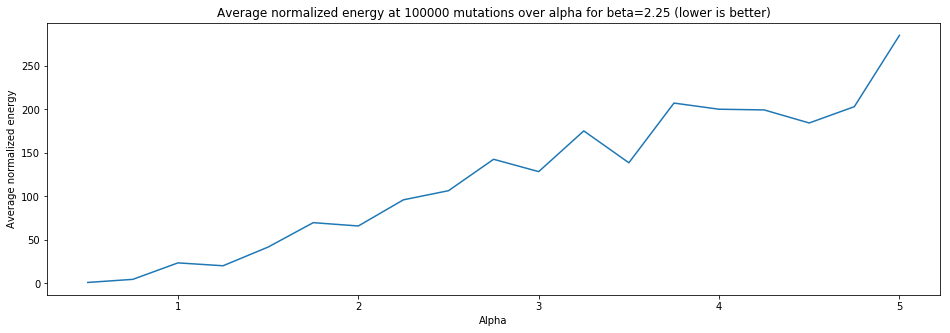

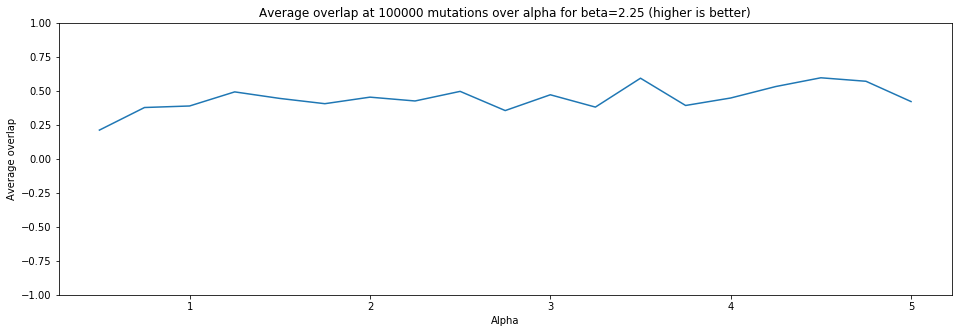

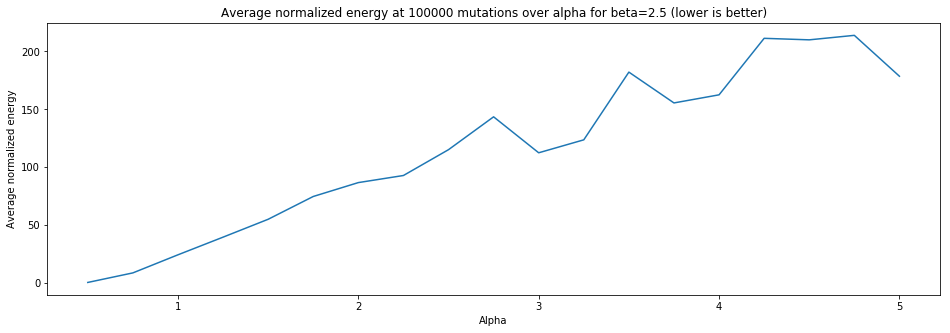

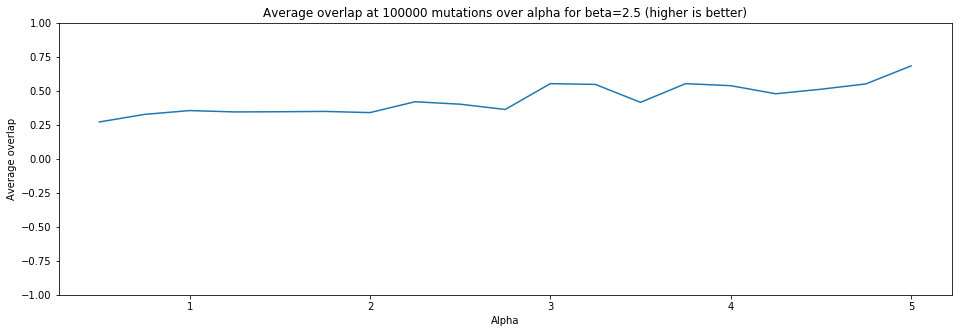

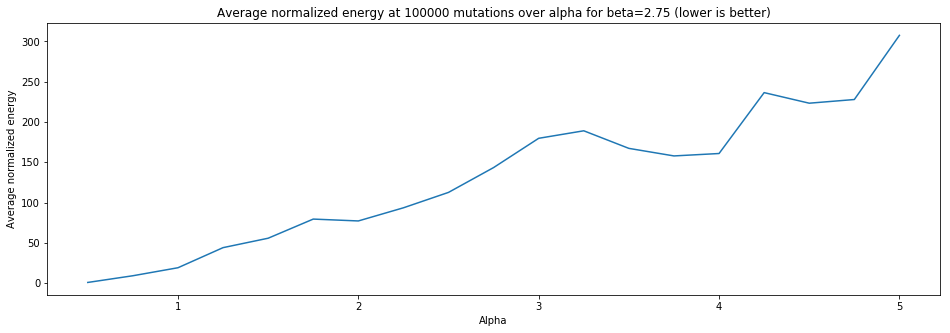

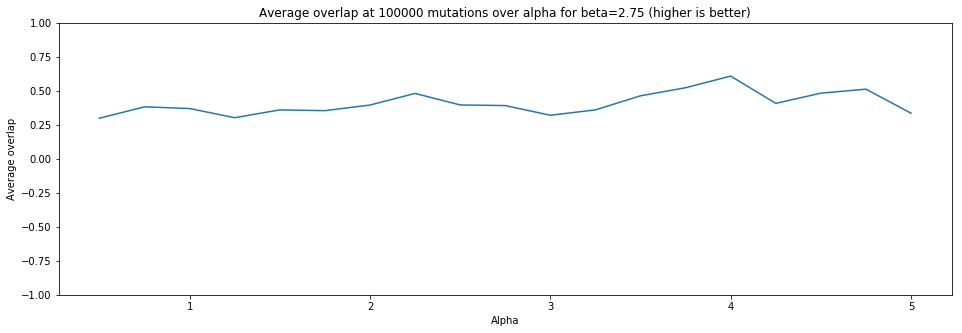

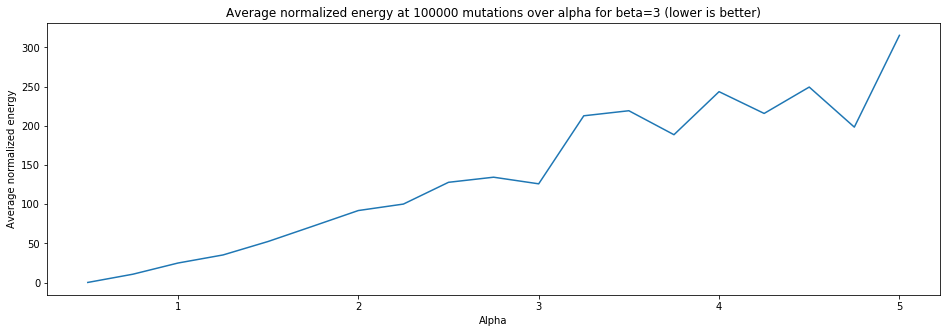

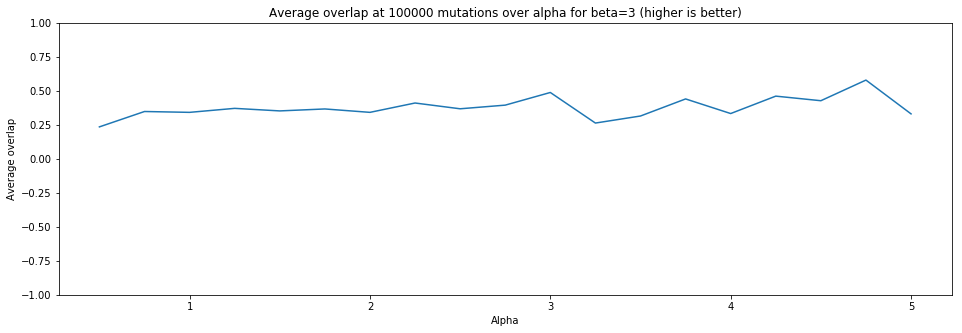

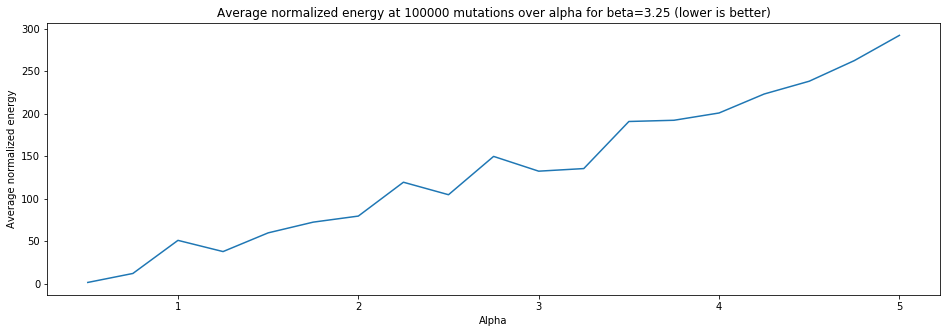

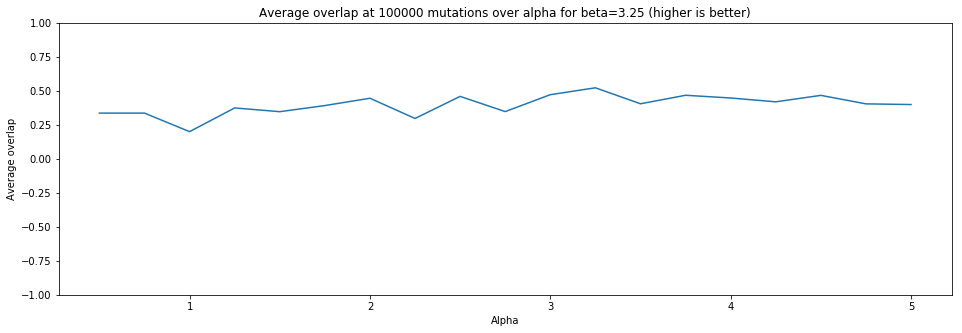

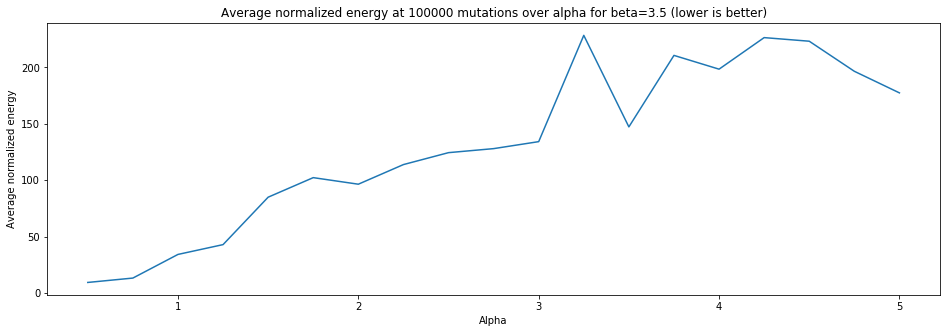

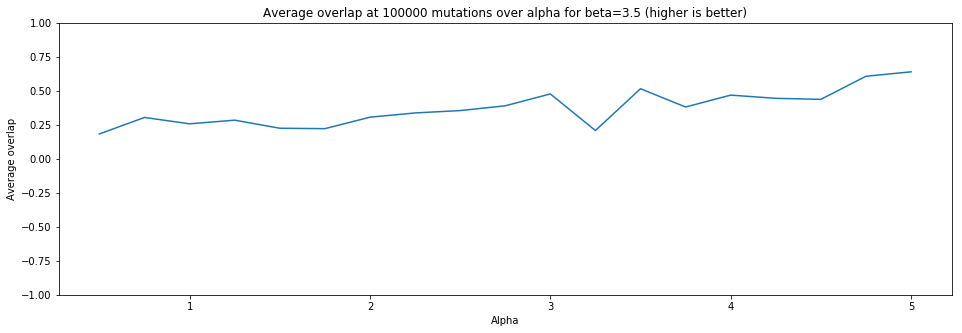

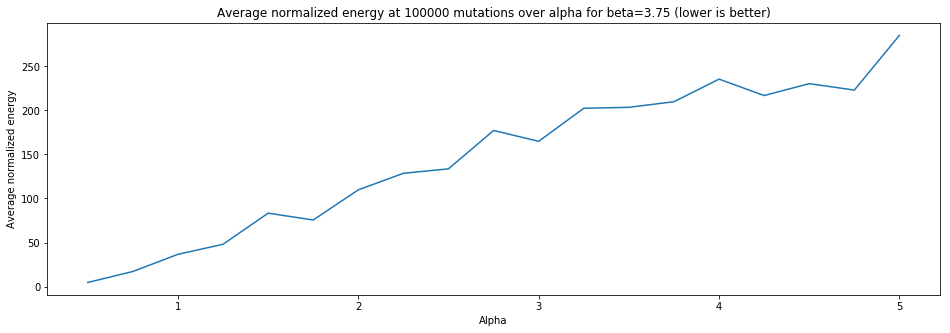

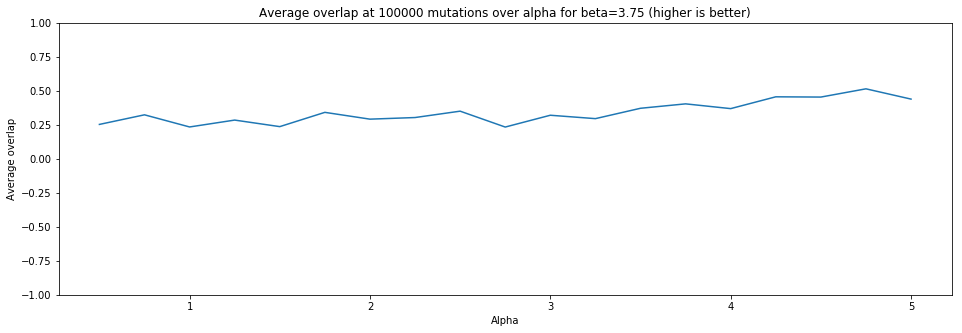

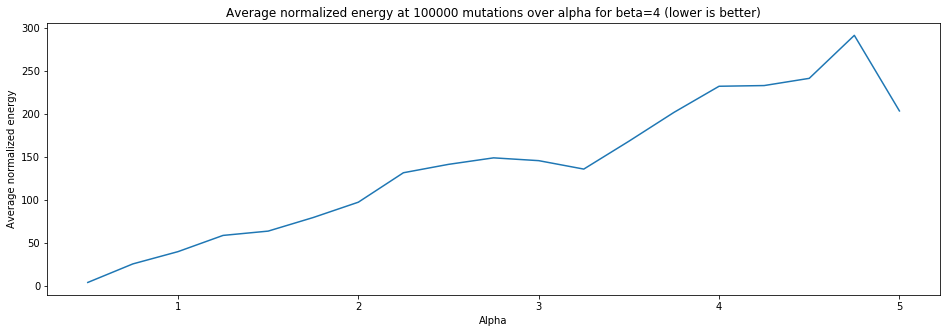

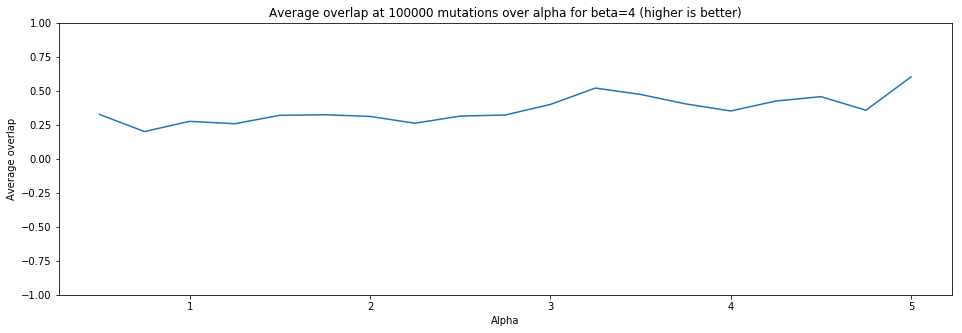

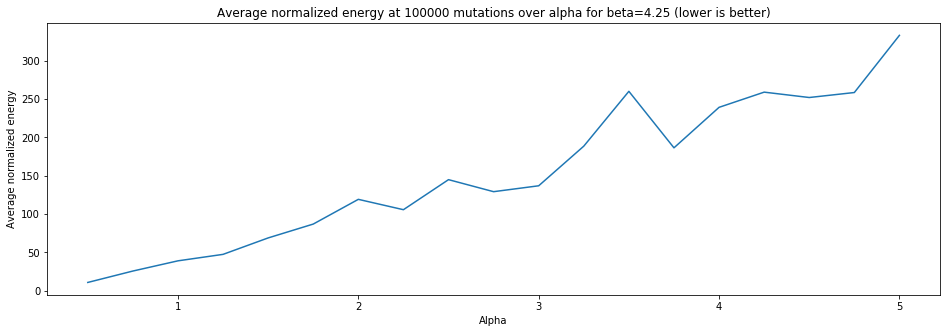

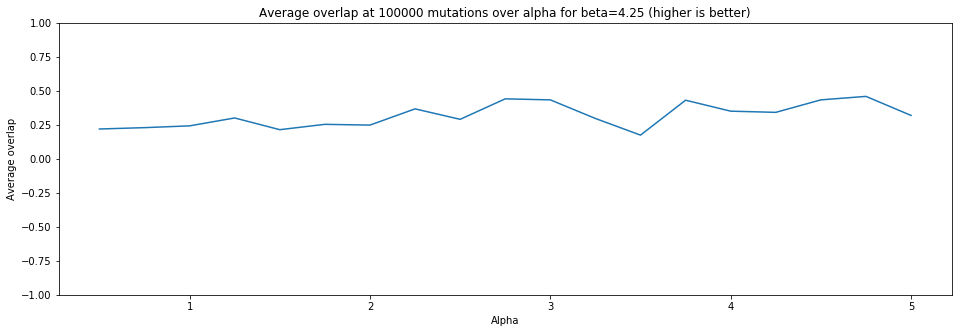

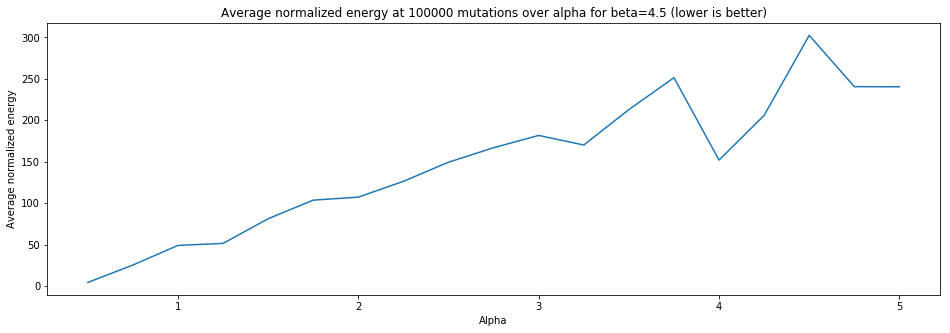

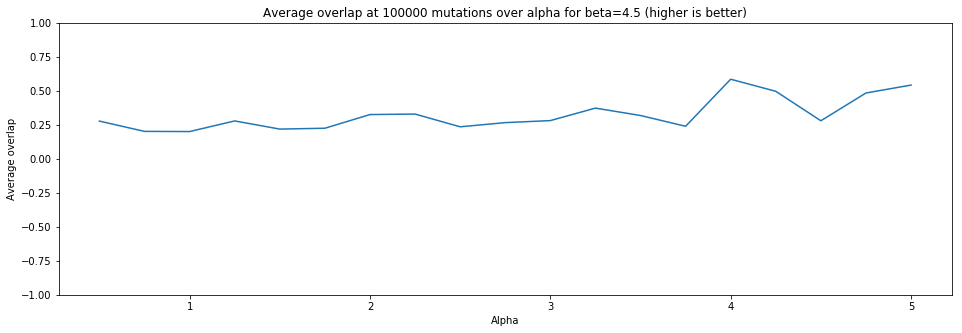

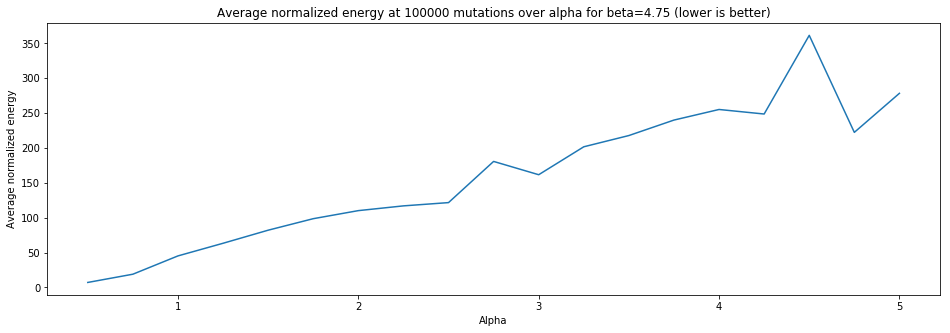

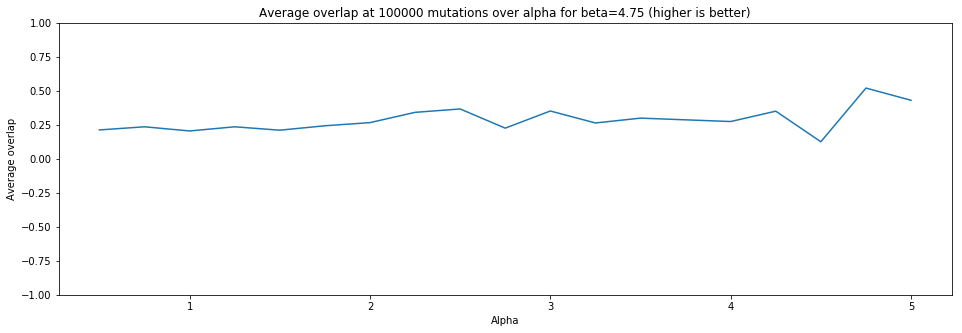

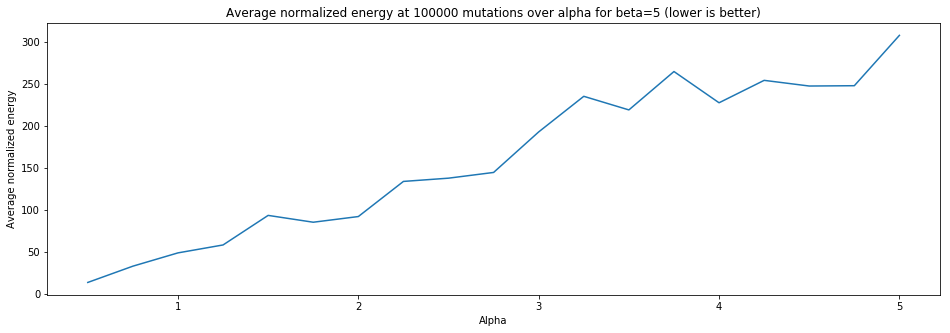

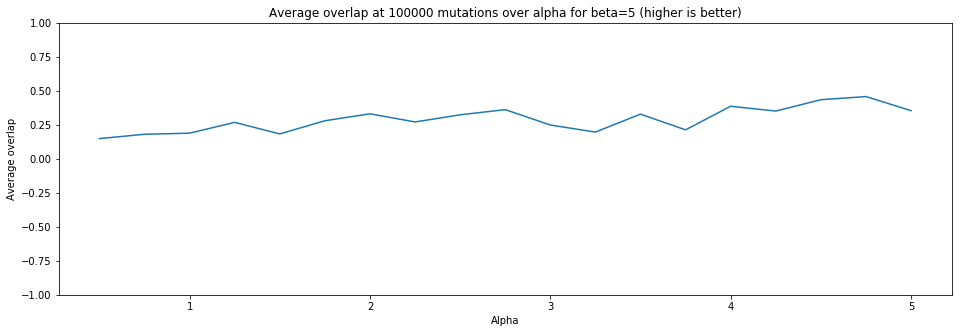

In [7]:
# Plot
for betaOffset in range(len(BETAS)):
    normalizedEnergysForBeta = np.zeros(len(ALPHAS))
    overlapsForBeta = np.zeros(len(ALPHAS))

    for i in range(len(ALPHAS)):
        index = i * len(BETAS) + betaOffset
        eMeasuresForAlpha, overlapMeasuresForAlpha = measures[index]
        averageEMeasuresForAlpha = np.mean(eMeasuresForAlpha, axis=1)
        averageOverlapForAlpha = np.mean(overlapMeasuresForAlpha, axis=1)

        normalizedEnergysForBeta[i] = averageEMeasuresForAlpha[-1];
        overlapsForBeta[i] = averageOverlapForAlpha[-1];
    
    plt.plot(ALPHAS, normalizedEnergysForBeta)
    plt.title('Average normalized energy at ' + str(T_FACTOR * N) + ' mutations over alpha for beta=' + str(BETAS[betaOffset])+ ' (lower is better)')
    plt.xlabel('Alpha')
    plt.ylabel('Average normalized energy')
    plt.show()
    
    plt.plot(ALPHAS, overlapsForBeta)
    plt.ylim(ymin=-1, ymax=1)
    plt.title('Average overlap at ' + str(T_FACTOR * N) + ' mutations over alpha for beta=' + str(BETAS[betaOffset])+ ' (higher is better)')
    plt.xlabel('Alpha')
    plt.ylabel('Average overlap')

    plt.show()